In [1]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

In [2]:
import IPython
print(IPython.__version__)
print(pd.__version__)

8.10.0
1.5.3


In [3]:
# melt_comp_wts = {'MgO':36.9, 'CaO':3.3, 'Al2O3':4.6, 'SiO2':50.7, 
#                  'Na2O':3e-7, 'K2O':3e-10, 'FeO':3.5}

# BSE composition from Schaefer & Fegley (TiO2 neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04}


In [4]:
system = vaporock.System(vapor_database='JANAF0')
# system = vaporock.System(vapor_database='LAMOR')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

MELTS liquid components:


[('SiO2', 0.17905092548091792),
 ('TiO2', 0.0),
 ('Al2O3', 0.046357815686249346),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.057344557277748086),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.4547890552892488),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.0674044301472555),
 ('Na2SiO3', 0.00564707947570578),
 ('KAlSiO4', 0.0008492983733812904),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [5]:
T = np.linspace(1500,3000,101)
P = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
DlogfO2 = +1.5
DlogfO2 = -1.5
g=36.2
logfO2 = vaporock.redox_buffer(T, buffer=buffer, dlogfO2=DlogfO2) #Oxygen fugacity for given temperature range and Pressure

# Optionally choose calculation method based on chemical potentials, both agree (method=['activity','chempot'])
logP, lnK, lna =  system.eval_gas_abundances(T, logfO2, full_output=True, method='activity')
print(logP)

density = system.calc_column_density(logP, logfO2, g)
density_high = system.get_abundant_species(density, N=20)
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP)




/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

                 1500.0     1515.0     1530.0     1545.0     1560.0  \
species_name                                                          
O(g)         -11.943176 -11.764964 -11.590276 -11.419010 -11.251067   
O2(g)        -13.101927 -12.920790 -12.743291 -12.569323 -12.398783   
Mg(g)         -8.598675  -8.435417  -8.275599  -8.119119  -7.965879   
MgO(g)       -13.822638 -13.595177 -13.372401 -13.154172 -12.940359   
Mg2(g)       -20.776958 -20.461087 -20.151993 -19.849474 -19.553334   
Ca(g)        -14.810952 -14.602668 -14.398698 -14.198913 -14.003190   
CaO(g)       -18.877084 -18.614661 -18.358117 -18.107251 -17.861874   
Ca2(g)       -32.430339 -32.025642 -31.629422 -31.241427 -30.861413   
Al(g)        -16.435111 -16.183119 -15.936190 -15.694176 -15.456933   
AlO(g)       -16.503225 -16.251780 -16.005420 -15.763995 -15.527359   
AlO2(g)      -21.070956 -20.779489 -20.493925 -20.214091 -19.939818   
Al2(g)       -31.880292 -31.435856 -31.000386 -30.573618 -30.155299   
Al2O(g

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [6]:
T1 = np.linspace(1500,3000,101)
P1 = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = [-4,-3,-2,-1,0,1,2,3,4,5,6,7]
g=9.81
LogfO21=np.zeros((len(T1),len(dlogfO2)))
LOGP1 = np.zeros((len(T1),len(dlogfO2),34))
Ptotal1=np.zeros((len(T1),len(dlogfO2)))
density1=np.zeros((len(T1),len(dlogfO2),34))
density_high1=np.zeros((len(T1),len(dlogfO2),20))
print(Ptotal1.shape,density1.shape)
mol_elem_frac1=np.zeros((len(T1),len(dlogfO2),10))
print(mol_elem_frac1.shape)
print('LOGP1', LOGP1.shape)
#Ptotal1[5,5]
AS =[]
for j in range(len(dlogfO2)):
        logfO21 = vaporock.redox_buffer(T1, buffer=buffer, dlogfO2=dlogfO2[j]) #Oxygen fugacity for given temperature range and Pressure
        LogfO21[:,j]=logfO21
        #print(i,logfO2)
        logP1, lnk1, lna1 =  system.eval_gas_abundances(T1, logfO21, full_output=True, method='activity')
        LOGP1a = np.array(logP1)
        LOGP1aT= np.transpose(LOGP1a)
        print('LOGP1a =' , LOGP1a.shape)
        LOGP1[:,j,:] = LOGP1aT
        CD=np.array(system.calc_column_density(logP1, logfO21, g))
        print(CD.shape)
        CDT=np.transpose(CD)
        density1[:,j,:] = CDT
        AS = (system.get_abundant_species(system.calc_column_density(logP1, logfO21, g), N=20))
        AST = np.transpose(AS)
        density_high1[:,j,:] = AST
        MEF ,PTOTAL = (system.calc_gas_props(T1, logP1))
        print(MEF)
        MEFA=np.array(MEF)
        MEFT = np.transpose(MEFA)
        print(MEFA.shape)
        mol_elem_frac1[:,j,:]=MEFT
            #print(mol_elem_frac1)
        Ptotal1[:,j]= np.array(np.sum(10**logP1, axis=0))
        #density1.shape
print('LOGP1a =' , LOGP1a.shape)
#print(MEFA.shape)
#print(density1)             

(101, 12) (101, 12, 34)
(101, 12, 10)
LOGP1 (101, 12, 34)


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   3.370622e-03  3.992745e-03  4.710551e-03  5.535322e-03  6.479111e-03   
Mg  2.028866e-03  2.324868e-03  2.654085e-03  3.018790e-03  3.421217e-03   
Ca  1.244453e-09  1.581791e-09  1.999024e-09  2.512128e-09  3.139592e-09   
Al  1.307245e-10  1.837533e-10  2.563682e-10  3.550760e-10  4.882911e-10   
Si  3.367747e-03  3.989431e-03  4.706744e-03  5.530966e-03  6.474144e-03   
Na  8.608590e-01  8.533797e-01  8.455130e-01  8.372472e-01  8.285712e-01   
K   4.554190e-02  4.558310e-02  4.559034e-02  4.556263e-02  4.549902e-02   
Fe  8.483184e-02  9.073014e-02  9.682526e-02  1.031050e-01  1.095553e-01   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   7.554704e-03  8.775564e-03  1.015575e-02  1.17098

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.980095e-03  2.353439e-03  2.786430e-03  3.286684e-03  3.862476e-03   
Mg  1.189641e-03  1.367846e-03  1.567180e-03  1.789349e-03  2.036088e-03   
Ca  7.297018e-10  9.306633e-10  1.180396e-09  1.489052e-09  1.868512e-09   
Al  4.737119e-11  6.680509e-11  9.352803e-11  1.300143e-10  1.794871e-10   
Si  1.974747e-03  2.347252e-03  2.779298e-03  3.278490e-03  3.853094e-03   
Na  8.976233e-01  8.928543e-01  8.878177e-01  8.825006e-01  8.768895e-01   
K   4.748685e-02  4.769165e-02  4.787144e-02  4.802533e-02  4.815234e-02   
Fe  4.974535e-02  5.338556e-02  5.717796e-02  6.111958e-02  6.520647e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   4.522759e-03  5.277160e-03  6.135976e-03  7.11015

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.147717e-03  1.366706e-03  1.621456e-03  1.916745e-03  2.257820e-03   
Mg  6.854433e-04  7.897357e-04  9.068002e-04  1.037762e-03  1.183789e-03   
Ca  4.204501e-10  5.373440e-10  6.830260e-10  8.636378e-10  1.086414e-09   
Al  1.972609e-11  2.786846e-11  3.909091e-11  5.445188e-11  7.533622e-11   
Si  1.137882e-03  1.355301e-03  1.608276e-03  1.901564e-03  2.240389e-03   
Na  9.197053e-01  9.166932e-01  9.135136e-01  9.101564e-01  9.066109e-01   
K   4.865506e-02  4.896501e-02  4.925699e-02  4.953036e-02  4.978444e-02   
Fe  2.866859e-02  3.083004e-02  3.309289e-02  3.545722e-02  3.792266e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   2.650422e-03  3.100803e-03  3.615744e-03  4.20256

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   6.672904e-04  7.951949e-04  9.442056e-04  1.117210e-03  1.317397e-03   
Mg  3.908587e-04  4.508686e-04  5.183653e-04  5.940414e-04  6.786237e-04   
Ca  2.397755e-10  3.068091e-10  3.904948e-10  4.944370e-10  6.228985e-10   
Al  1.076539e-11  1.522179e-11  2.137089e-11  2.979795e-11  4.127044e-11   
Si  6.489931e-04  7.739326e-04  9.195785e-04  1.088775e-03  1.284669e-03   
Na  9.325965e-01  9.306545e-01  9.286137e-01  9.264674e-01  9.242082e-01   
K   4.933705e-02  4.971076e-02  5.007120e-02  5.041801e-02  5.075077e-02   
Fe  1.635930e-02  1.761473e-02  1.893291e-02  2.031459e-02  2.176030e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   1.548281e-03  1.813714e-03  2.117909e-03  2.46545

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   4.054729e-04  4.829054e-04  5.731128e-04  6.778556e-04  7.990849e-04   
Mg  2.215420e-04  2.557319e-04  2.942327e-04  3.374540e-04  3.858283e-04   
Ca  1.359485e-10  1.740821e-10  2.217380e-10  2.809957e-10  3.543200e-10   
Al  7.907245e-12  1.118505e-11  1.571043e-11  2.191610e-11  3.037017e-11   
Si  3.681084e-04  4.392904e-04  5.223624e-04  6.189835e-04  7.309942e-04   
Na  9.399835e-01  9.386680e-01  9.372963e-01  9.358641e-01  9.343667e-01   
K   4.972784e-02  5.013880e-02  5.053937e-02  5.092938e-02  5.130860e-02   
Fe  9.293525e-03  1.001531e-02  1.077467e-02  1.157228e-02  1.240876e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.389554e-04  1.099839e-03  1.284341e-03  1.49530

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogad

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   3.276659e-04  3.898615e-04  4.622920e-04  5.463737e-04  6.436788e-04   
Mg  1.251376e-04  1.445053e-04  1.663292e-04  1.908462e-04  2.183070e-04   
Ca  7.686485e-11  9.847576e-11  1.255031e-10  1.591370e-10  2.007906e-10   
Al  7.009025e-12  9.917109e-12  1.393348e-11  1.944328e-11  2.695256e-11   
Si  2.083784e-04  2.487944e-04  2.959957e-04  3.509379e-04  4.146836e-04   
Na  9.441061e-01  9.431367e-01  9.421342e-01  9.410954e-01  9.400171e-01   
K   4.994594e-02  5.037749e-02  5.080023e-02  5.121406e-02  5.161888e-02   
Fe  5.286822e-03  5.702660e-03  6.141001e-03  6.602383e-03  7.087319e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   7.559476e-04  8.851010e-04  1.033253e-03  1.20272

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogad

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.109428e-03  1.329008e-03  1.586423e-03  1.887177e-03  2.237416e-03   
Mg  7.049964e-05  8.141713e-05  9.371937e-05  1.075393e-04  1.230175e-04   
Ca  4.343668e-11  5.567555e-11  7.099175e-11  9.006451e-11  1.137014e-10   
Al  6.731009e-12  9.524574e-12  1.338301e-11  1.867633e-11  2.589063e-11   
Si  1.182025e-04  1.411849e-04  1.680368e-04  1.993045e-04  2.355950e-04   
Na  9.456302e-01  9.446973e-01  9.437168e-01  9.426824e-01  9.415871e-01   
K   5.002656e-02  5.046084e-02  5.088555e-02  5.130040e-02  5.170506e-02   
Fe  3.045067e-03  3.290210e-03  3.549427e-03  3.823146e-03  4.111782e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   2.643976e-03  3.114434e-03  3.657160e-03  4.28137

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.463318e-02  1.754982e-02  2.096045e-02  2.493084e-02  2.953180e-02   
Mg  3.918693e-05  4.514112e-05  5.180729e-05  5.923905e-05  6.748861e-05   
Ca  2.437730e-11  3.120578e-11  3.972572e-11  5.029640e-11  6.333813e-11   
Al  6.577324e-12  9.285304e-12  1.301042e-11  1.809644e-11  2.498928e-11   
Si  6.711937e-05  8.004634e-05  9.508209e-05  1.124947e-04  1.325713e-04   
Na  9.340377e-01  9.306548e-01  9.268014e-01  9.224152e-01  9.174295e-01   
K   4.941323e-02  4.971070e-02  4.997340e-02  5.019740e-02  5.037842e-02   
Fe  1.809532e-03  1.959469e-03  2.117888e-03  2.284813e-03  2.460181e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   3.483881e-02  4.093134e-02  4.789188e-02  5.58046

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   2.019957e-01  2.335190e-01  2.675880e-01  3.038973e-01  3.420473e-01   
Mg  1.789811e-05  1.986991e-05  2.187633e-05  2.388325e-05  2.585449e-05   
Ca  1.146982e-11  1.420323e-11  1.741583e-11  2.114522e-11  2.542177e-11   
Al  5.361036e-12  7.298270e-12  9.816362e-12  1.304481e-11  1.712809e-11   
Si  3.269634e-05  3.768584e-05  4.306587e-05  4.878805e-05  5.478986e-05   
Na  7.569160e-01  7.265642e-01  6.938340e-01  6.590187e-01  6.225004e-01   
K   4.004287e-02  3.880912e-02  3.741158e-02  3.586332e-02  3.418292e-02   
Fe  9.948759e-04  1.050091e-03  1.101502e-03  1.148055e-03  1.188801e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   3.815611e-01  4.219084e-01  4.625342e-01  5.02889

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   8.167325e-01  8.428729e-01  8.654690e-01  8.848942e-01  9.015246e-01   
Mg  2.328427e-06  2.309970e-06  2.281657e-06  2.245658e-06  2.203887e-06   
Ca  1.628993e-12  1.821100e-12  2.025219e-12  2.242365e-12  2.473763e-12   
Al  1.269425e-12  1.547141e-12  1.870438e-12  2.245116e-12  2.677676e-12   
Si  5.085067e-06  5.272565e-06  5.441348e-06  5.593555e-06  5.731340e-06   
Na  1.738643e-01  1.489721e-01  1.274679e-01  1.089923e-01  9.318401e-02   
K   9.197797e-03  7.957192e-03  6.872993e-03  5.931197e-03  5.116863e-03   
Fe  1.980486e-04  1.902854e-04  1.823587e-04  1.744315e-04  1.666271e-04   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.157198e-01  9.278123e-01  9.381011e-01  9.46850

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   9.874972e-01  9.895901e-01  9.913038e-01  9.927116e-01  9.938715e-01   
Mg  9.131388e-08  8.827214e-08  8.539420e-08  8.268130e-08  8.013302e-08   
Ca  8.035870e-14  8.943031e-14  9.954891e-14  1.108377e-13  1.234306e-13   
Al  9.511116e-14  1.134914e-13  1.350222e-13  1.601910e-13  1.895540e-13   
Si  2.995229e-07  3.055705e-07  3.116896e-07  3.178952e-07  3.241992e-07   
Na  1.185906e-02  9.867285e-03  8.237142e-03  6.898814e-03  5.796608e-03   
K   6.273512e-04  5.270327e-04  4.441239e-04  3.754058e-04  3.182831e-04   
Fe  1.602818e-05  1.523584e-05  1.450129e-05  1.381941e-05  1.318548e-05   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.948303e-01  9.956254e-01  9.962866e-01  9.96838

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

LOGP1a = (34, 101)
(34, 101)
          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   9.992868e-01  9.994072e-01  9.995054e-01  9.995859e-01  9.996520e-01   
Mg  3.130119e-09  3.050191e-09  2.978875e-09  2.916001e-09  2.861423e-09   
Ca  4.386132e-15  5.044253e-15  5.799054e-15  6.662752e-15  7.648677e-15   
Al  6.963066e-15  8.444438e-15  1.021923e-14  1.234150e-14  1.487444e-14   
Si  2.018078e-08  2.081055e-08  2.145482e-08  2.211346e-08  2.278631e-08   
Na  6.760453e-04  5.614789e-04  4.680537e-04  3.915807e-04  3.287538e-04   
K   3.575980e-05  2.998650e-05  2.523297e-05  2.130516e-05  1.804839e-05   
Fe  1.367578e-06  1.310890e-06  1.257709e-06  1.207731e-06  1.160684e-06   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.997066e-01  9.997517e-01  9.997892e-01  9.99820

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])


In [92]:
print(LOGP1a.shape)

(34, 101)


In [8]:
Vapo_species=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
Vapos=[ 'O2(g)','O(g)','NaO(g)','Na(g)','SiO2(g)','FeO(g)','KO(g)','MgO(g)','K(g)','SiO(g)','AlO2(g)','Mg(g)','Fe(g)','AlO(g)','CaO(g)','Na2(g)','Ca(g)','Al(g)','K2(g)','Al2O2(g)']
elements =['Oxygen','Magensium','Calcium','Alumnium','Silicon','Sodium','Potasium','Iron','Titanium','Chromium']

In [42]:
density1df = pd.DataFrame(density1[:,0,:],index=T1,columns=Vapo_species)
density1dfT = density1df.T

In [43]:
density1df

,O(g),O2(g),Mg(g),MgO(g),Mg2(g),Ca(g),CaO(g),Ca2(g),Al(g),AlO(g),...,K2(g),Fe(g),FeO(g),TiO(g),Ti(g),TiO2(g),Cr(g),CrO(g),CrO2(g),CrO3(g)
1500.0,2.459100e+08,4.797273e+05,1.131621e+14,2.291263e+07,6.674035e+02,4.209340e+07,1.452766e+02,8.990766e-10,6.264501e+06,1.890429e+05,...,9.187678e+06,2.059224e+15,5.344657e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1515.0,3.706705e+08,7.279998e+05,1.648009e+14,3.868440e+07,1.381209e+03,6.799823e+07,2.658385e+02,2.282935e-09,1.119126e+07,3.372911e+05,...,1.416591e+07,2.799037e+15,7.821684e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530.0,5.542114e+08,1.095546e+06,2.381097e+14,6.461182e+07,2.814185e+03,1.087596e+08,4.799129e+02,5.684779e-09,1.976095e+07,5.947917e+05,...,2.164572e+07,3.780470e+15,1.135599e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545.0,8.221315e+08,1.635305e+06,3.413946e+14,1.067925e+08,5.647702e+03,1.722869e+08,8.551224e+02,1.389022e-08,3.450022e+07,1.037028e+06,...,3.278721e+07,5.074545e+15,1.636049e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560.0,1.210276e+09,2.421804e+06,4.858438e+14,1.747246e+08,1.116894e+04,2.703807e+08,1.504546e+03,3.332134e-08,5.957506e+07,1.788243e+06,...,4.924389e+07,6.770830e+15,2.339450e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940.0,1.399008e+17,3.032095e+14,4.885603e+21,1.421312e+18,2.378129e+17,3.316100e+17,2.384053e+14,9.385895e+09,1.101808e+19,2.886577e+17,...,6.719247e+15,4.311853e+21,3.298259e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955.0,1.554318e+17,3.364518e+14,5.316359e+21,1.605583e+18,2.781591e+17,3.712435e+17,2.743633e+14,1.160534e+10,1.273711e+19,3.333507e+17,...,7.419322e+15,4.633746e+21,3.599398e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2970.0,1.724991e+17,3.729270e+14,5.779360e+21,1.811215e+18,3.247294e+17,4.150915e+17,3.152699e+14,1.431434e+10,1.470186e+19,3.843784e+17,...,8.182919e+15,4.975679e+21,3.924086e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2985.0,1.912352e+17,4.129079e+14,6.276555e+21,2.040378e+18,3.783850e+17,4.635445e+17,3.617391e+14,1.761299e+10,1.694416e+19,4.425539e+17,...,9.014893e+15,5.338629e+21,4.273834e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
for col in density1df.columns:
    vapo_species = col

In [45]:
Vapo_species
density1dfT['Species name']=Vapo_species
density1dfT

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,1500.0,1515.0,1530.0,1545.0,1560.0,1575.0,1590.0,1605.0,1620.0,1635.0,...,2880.0,2895.0,2910.0,2925.0,2940.0,2955.0,2970.0,2985.0,3000.0,Species name
O(g),2.459100e+08,3.706705e+08,5.542114e+08,8.221315e+08,1.210276e+09,1.768480e+09,2.565546e+09,3.695826e+09,5.287862e+09,7.515665e+09,...,9.079566e+16,1.013329e+17,1.129622e+17,1.257825e+17,1.399008e+17,1.554318e+17,1.724991e+17,1.912352e+17,2.117826e+17,O(g)
O2(g),4.797273e+05,7.279998e+05,1.095546e+06,1.635305e+06,2.421804e+06,3.559178e+06,5.191895e+06,7.518984e+06,1.081278e+07,1.544349e+07,...,1.977333e+14,2.204208e+14,2.454231e+14,2.729457e+14,3.032095e+14,3.364518e+14,3.729270e+14,4.129079e+14,4.566862e+14,O2(g)
Mg(g),1.131621e+14,1.648009e+14,2.381097e+14,3.413946e+14,4.858438e+14,6.864232e+14,9.630168e+14,1.341869e+15,1.857398e+15,2.554467e+15,...,3.448932e+21,3.768556e+21,4.113445e+21,4.485226e+21,4.885603e+21,5.316359e+21,5.779360e+21,6.276555e+21,6.809981e+21,Mg(g)
MgO(g),2.291263e+07,3.868440e+07,6.461182e+07,1.067925e+08,1.747246e+08,2.830603e+08,4.541904e+08,7.220187e+08,1.137428e+09,1.776126e+09,...,8.603162e+17,9.775178e+17,1.109035e+18,1.256406e+18,1.421312e+18,1.605583e+18,1.811215e+18,2.040378e+18,2.295430e+18,MgO(g)
Mg2(g),6.674035e+02,1.381209e+03,2.814185e+03,5.647702e+03,1.116894e+04,2.177513e+04,4.186964e+04,7.943295e+04,1.487416e+05,2.750146e+05,...,1.245739e+17,1.468738e+17,1.728125e+17,2.029242e+17,2.378129e+17,2.781591e+17,3.247294e+17,3.783850e+17,4.400917e+17,Mg2(g)
Ca(g),4.209340e+07,6.799823e+07,1.087596e+08,1.722869e+08,2.703807e+08,4.204910e+08,6.482007e+08,9.907040e+08,1.501640e+09,2.257755e+09,...,2.083819e+17,2.345129e+17,2.635668e+17,2.958293e+17,3.316100e+17,3.712435e+17,4.150915e+17,4.635445e+17,5.170230e+17,Ca(g)
CaO(g),1.452766e+02,2.658385e+02,4.799129e+02,8.551224e+02,1.504546e+03,2.615023e+03,4.491712e+03,7.627475e+03,1.280977e+04,2.128361e+04,...,1.338219e+14,1.549738e+14,1.791813e+14,2.068434e+14,2.384053e+14,2.743633e+14,3.152699e+14,3.617391e+14,4.144526e+14,CaO(g)
Ca2(g),8.990766e-10,2.282935e-09,5.684779e-09,1.389022e-08,3.332134e-08,7.852118e-08,1.818555e-07,4.141494e-07,9.278682e-07,2.046040e-06,...,3.914811e+09,4.890390e+09,6.093073e+09,7.571950e+09,9.385895e+09,1.160534e+10,1.431434e+10,1.761299e+10,2.162021e+10,Ca2(g)
Al(g),6.264501e+06,1.119126e+07,1.976095e+07,3.450022e+07,5.957506e+07,1.017825e+08,1.720996e+08,2.880797e+08,4.775223e+08,7.840453e+08,...,6.072924e+18,7.065192e+18,8.206223e+18,9.516277e+18,1.101808e+19,1.273711e+19,1.470186e+19,1.694416e+19,1.949955e+19,Al(g)
AlO(g),1.890429e+05,3.372911e+05,5.947917e+05,1.037028e+06,1.788243e+06,3.050783e+06,5.150848e+06,8.609094e+06,1.424857e+07,2.335818e+07,...,1.597703e+17,1.856785e+17,2.154389e+17,2.495711e+17,2.886577e+17,3.333507e+17,3.843784e+17,4.425539e+17,5.087834e+17,AlO(g)


In [46]:
species_type=['a']*34
#species_type
density1dfT['Species type']=species_type
density1dfT

,1500.0,1515.0,1530.0,1545.0,1560.0,1575.0,1590.0,1605.0,1620.0,1635.0,...,2895.0,2910.0,2925.0,2940.0,2955.0,2970.0,2985.0,3000.0,Species name,Species type
O(g),2.459100e+08,3.706705e+08,5.542114e+08,8.221315e+08,1.210276e+09,1.768480e+09,2.565546e+09,3.695826e+09,5.287862e+09,7.515665e+09,...,1.013329e+17,1.129622e+17,1.257825e+17,1.399008e+17,1.554318e+17,1.724991e+17,1.912352e+17,2.117826e+17,O(g),a
O2(g),4.797273e+05,7.279998e+05,1.095546e+06,1.635305e+06,2.421804e+06,3.559178e+06,5.191895e+06,7.518984e+06,1.081278e+07,1.544349e+07,...,2.204208e+14,2.454231e+14,2.729457e+14,3.032095e+14,3.364518e+14,3.729270e+14,4.129079e+14,4.566862e+14,O2(g),a
Mg(g),1.131621e+14,1.648009e+14,2.381097e+14,3.413946e+14,4.858438e+14,6.864232e+14,9.630168e+14,1.341869e+15,1.857398e+15,2.554467e+15,...,3.768556e+21,4.113445e+21,4.485226e+21,4.885603e+21,5.316359e+21,5.779360e+21,6.276555e+21,6.809981e+21,Mg(g),a
MgO(g),2.291263e+07,3.868440e+07,6.461182e+07,1.067925e+08,1.747246e+08,2.830603e+08,4.541904e+08,7.220187e+08,1.137428e+09,1.776126e+09,...,9.775178e+17,1.109035e+18,1.256406e+18,1.421312e+18,1.605583e+18,1.811215e+18,2.040378e+18,2.295430e+18,MgO(g),a
Mg2(g),6.674035e+02,1.381209e+03,2.814185e+03,5.647702e+03,1.116894e+04,2.177513e+04,4.186964e+04,7.943295e+04,1.487416e+05,2.750146e+05,...,1.468738e+17,1.728125e+17,2.029242e+17,2.378129e+17,2.781591e+17,3.247294e+17,3.783850e+17,4.400917e+17,Mg2(g),a
Ca(g),4.209340e+07,6.799823e+07,1.087596e+08,1.722869e+08,2.703807e+08,4.204910e+08,6.482007e+08,9.907040e+08,1.501640e+09,2.257755e+09,...,2.345129e+17,2.635668e+17,2.958293e+17,3.316100e+17,3.712435e+17,4.150915e+17,4.635445e+17,5.170230e+17,Ca(g),a
CaO(g),1.452766e+02,2.658385e+02,4.799129e+02,8.551224e+02,1.504546e+03,2.615023e+03,4.491712e+03,7.627475e+03,1.280977e+04,2.128361e+04,...,1.549738e+14,1.791813e+14,2.068434e+14,2.384053e+14,2.743633e+14,3.152699e+14,3.617391e+14,4.144526e+14,CaO(g),a
Ca2(g),8.990766e-10,2.282935e-09,5.684779e-09,1.389022e-08,3.332134e-08,7.852118e-08,1.818555e-07,4.141494e-07,9.278682e-07,2.046040e-06,...,4.890390e+09,6.093073e+09,7.571950e+09,9.385895e+09,1.160534e+10,1.431434e+10,1.761299e+10,2.162021e+10,Ca2(g),a
Al(g),6.264501e+06,1.119126e+07,1.976095e+07,3.450022e+07,5.957506e+07,1.017825e+08,1.720996e+08,2.880797e+08,4.775223e+08,7.840453e+08,...,7.065192e+18,8.206223e+18,9.516277e+18,1.101808e+19,1.273711e+19,1.470186e+19,1.694416e+19,1.949955e+19,Al(g),a
AlO(g),1.890429e+05,3.372911e+05,5.947917e+05,1.037028e+06,1.788243e+06,3.050783e+06,5.150848e+06,8.609094e+06,1.424857e+07,2.335818e+07,...,1.856785e+17,2.154389e+17,2.495711e+17,2.886577e+17,3.333507e+17,3.843784e+17,4.425539e+17,5.087834e+17,AlO(g),a


In [47]:
Species_type=density1dfT['Species name'].tolist()
Species_type

['O(g)',
 'O2(g)',
 'Mg(g)',
 'MgO(g)',
 'Mg2(g)',
 'Ca(g) ',
 'CaO(g)',
 'Ca2(g)',
 'Al(g) ',
 'AlO(g)',
 'AlO2(g)',
 'Al2(g)',
 'Al2O(g)',
 'Al2O2(g)',
 'Si(g) ',
 'SiO(g)',
 'SiO2(g',
 'Si2(g)',
 'Si3(g)',
 'Na(g) ',
 'NaO(g)',
 'Na2(g)',
 'K(g)  ',
 'KO(g) ',
 'K2(g) ',
 'Fe(g) ',
 'FeO(g)',
 'TiO(g)',
 'Ti(g) ',
 'TiO2(g)',
 'Cr(g) ',
 'CrO(g)',
 'CrO2(g)',
 'CrO3(g)']

In [48]:
np.arange(1,36,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

In [49]:
np.arange(1,36,1)
for i in range(34):
    for j in (np.arange(0,34,1)):
        if Vapo_species[i][0]=='O':
            species_type[i]='Oxygen'
        if Vapo_species[i][0]=='M':
            species_type[i]='Magnesium'
        if Vapo_species[i][0]=='C':
            species_type[i]='Calcium'
        if Vapo_species[i][0]=='A':
            species_type[i]='Alumnium'
        if Vapo_species[i][0]=='S':
            species_type[i]='Silicon'
        if Vapo_species[i][0]=='N':
            species_type[i]='Sodium'
        if Vapo_species[i][0]=='K':
            species_type[i]='Potasium'
        if Vapo_species[i][0]=='F':
            species_type[i]='Iron'
        if Vapo_species[i][0]=='T':
            species_type[i]='Titanium'
        if Vapo_species[i][1]=='r':
            species_type[i]='Chromium'





In [50]:
density1dfT['Species type']=species_type

In [51]:
density1dfT['Species type'] = density1dfT['Species type'].where(~density1dfT['Species type'].duplicated(),'')
density1dfT

,1500.0,1515.0,1530.0,1545.0,1560.0,1575.0,1590.0,1605.0,1620.0,1635.0,...,2895.0,2910.0,2925.0,2940.0,2955.0,2970.0,2985.0,3000.0,Species name,Species type
O(g),2.459100e+08,3.706705e+08,5.542114e+08,8.221315e+08,1.210276e+09,1.768480e+09,2.565546e+09,3.695826e+09,5.287862e+09,7.515665e+09,...,1.013329e+17,1.129622e+17,1.257825e+17,1.399008e+17,1.554318e+17,1.724991e+17,1.912352e+17,2.117826e+17,O(g),Oxygen
O2(g),4.797273e+05,7.279998e+05,1.095546e+06,1.635305e+06,2.421804e+06,3.559178e+06,5.191895e+06,7.518984e+06,1.081278e+07,1.544349e+07,...,2.204208e+14,2.454231e+14,2.729457e+14,3.032095e+14,3.364518e+14,3.729270e+14,4.129079e+14,4.566862e+14,O2(g),
Mg(g),1.131621e+14,1.648009e+14,2.381097e+14,3.413946e+14,4.858438e+14,6.864232e+14,9.630168e+14,1.341869e+15,1.857398e+15,2.554467e+15,...,3.768556e+21,4.113445e+21,4.485226e+21,4.885603e+21,5.316359e+21,5.779360e+21,6.276555e+21,6.809981e+21,Mg(g),Magnesium
MgO(g),2.291263e+07,3.868440e+07,6.461182e+07,1.067925e+08,1.747246e+08,2.830603e+08,4.541904e+08,7.220187e+08,1.137428e+09,1.776126e+09,...,9.775178e+17,1.109035e+18,1.256406e+18,1.421312e+18,1.605583e+18,1.811215e+18,2.040378e+18,2.295430e+18,MgO(g),
Mg2(g),6.674035e+02,1.381209e+03,2.814185e+03,5.647702e+03,1.116894e+04,2.177513e+04,4.186964e+04,7.943295e+04,1.487416e+05,2.750146e+05,...,1.468738e+17,1.728125e+17,2.029242e+17,2.378129e+17,2.781591e+17,3.247294e+17,3.783850e+17,4.400917e+17,Mg2(g),
Ca(g),4.209340e+07,6.799823e+07,1.087596e+08,1.722869e+08,2.703807e+08,4.204910e+08,6.482007e+08,9.907040e+08,1.501640e+09,2.257755e+09,...,2.345129e+17,2.635668e+17,2.958293e+17,3.316100e+17,3.712435e+17,4.150915e+17,4.635445e+17,5.170230e+17,Ca(g),Calcium
CaO(g),1.452766e+02,2.658385e+02,4.799129e+02,8.551224e+02,1.504546e+03,2.615023e+03,4.491712e+03,7.627475e+03,1.280977e+04,2.128361e+04,...,1.549738e+14,1.791813e+14,2.068434e+14,2.384053e+14,2.743633e+14,3.152699e+14,3.617391e+14,4.144526e+14,CaO(g),
Ca2(g),8.990766e-10,2.282935e-09,5.684779e-09,1.389022e-08,3.332134e-08,7.852118e-08,1.818555e-07,4.141494e-07,9.278682e-07,2.046040e-06,...,4.890390e+09,6.093073e+09,7.571950e+09,9.385895e+09,1.160534e+10,1.431434e+10,1.761299e+10,2.162021e+10,Ca2(g),
Al(g),6.264501e+06,1.119126e+07,1.976095e+07,3.450022e+07,5.957506e+07,1.017825e+08,1.720996e+08,2.880797e+08,4.775223e+08,7.840453e+08,...,7.065192e+18,8.206223e+18,9.516277e+18,1.101808e+19,1.273711e+19,1.470186e+19,1.694416e+19,1.949955e+19,Al(g),Alumnium
AlO(g),1.890429e+05,3.372911e+05,5.947917e+05,1.037028e+06,1.788243e+06,3.050783e+06,5.150848e+06,8.609094e+06,1.424857e+07,2.335818e+07,...,1.856785e+17,2.154389e+17,2.495711e+17,2.886577e+17,3.333507e+17,3.843784e+17,4.425539e+17,5.087834e+17,AlO(g),


In [52]:
color=['a']*34
#species_type
density1dfT['Color']=color
density1dfT

,1500.0,1515.0,1530.0,1545.0,1560.0,1575.0,1590.0,1605.0,1620.0,1635.0,...,2910.0,2925.0,2940.0,2955.0,2970.0,2985.0,3000.0,Species name,Species type,Color
O(g),2.459100e+08,3.706705e+08,5.542114e+08,8.221315e+08,1.210276e+09,1.768480e+09,2.565546e+09,3.695826e+09,5.287862e+09,7.515665e+09,...,1.129622e+17,1.257825e+17,1.399008e+17,1.554318e+17,1.724991e+17,1.912352e+17,2.117826e+17,O(g),Oxygen,a
O2(g),4.797273e+05,7.279998e+05,1.095546e+06,1.635305e+06,2.421804e+06,3.559178e+06,5.191895e+06,7.518984e+06,1.081278e+07,1.544349e+07,...,2.454231e+14,2.729457e+14,3.032095e+14,3.364518e+14,3.729270e+14,4.129079e+14,4.566862e+14,O2(g),,a
Mg(g),1.131621e+14,1.648009e+14,2.381097e+14,3.413946e+14,4.858438e+14,6.864232e+14,9.630168e+14,1.341869e+15,1.857398e+15,2.554467e+15,...,4.113445e+21,4.485226e+21,4.885603e+21,5.316359e+21,5.779360e+21,6.276555e+21,6.809981e+21,Mg(g),Magnesium,a
MgO(g),2.291263e+07,3.868440e+07,6.461182e+07,1.067925e+08,1.747246e+08,2.830603e+08,4.541904e+08,7.220187e+08,1.137428e+09,1.776126e+09,...,1.109035e+18,1.256406e+18,1.421312e+18,1.605583e+18,1.811215e+18,2.040378e+18,2.295430e+18,MgO(g),,a
Mg2(g),6.674035e+02,1.381209e+03,2.814185e+03,5.647702e+03,1.116894e+04,2.177513e+04,4.186964e+04,7.943295e+04,1.487416e+05,2.750146e+05,...,1.728125e+17,2.029242e+17,2.378129e+17,2.781591e+17,3.247294e+17,3.783850e+17,4.400917e+17,Mg2(g),,a
Ca(g),4.209340e+07,6.799823e+07,1.087596e+08,1.722869e+08,2.703807e+08,4.204910e+08,6.482007e+08,9.907040e+08,1.501640e+09,2.257755e+09,...,2.635668e+17,2.958293e+17,3.316100e+17,3.712435e+17,4.150915e+17,4.635445e+17,5.170230e+17,Ca(g),Calcium,a
CaO(g),1.452766e+02,2.658385e+02,4.799129e+02,8.551224e+02,1.504546e+03,2.615023e+03,4.491712e+03,7.627475e+03,1.280977e+04,2.128361e+04,...,1.791813e+14,2.068434e+14,2.384053e+14,2.743633e+14,3.152699e+14,3.617391e+14,4.144526e+14,CaO(g),,a
Ca2(g),8.990766e-10,2.282935e-09,5.684779e-09,1.389022e-08,3.332134e-08,7.852118e-08,1.818555e-07,4.141494e-07,9.278682e-07,2.046040e-06,...,6.093073e+09,7.571950e+09,9.385895e+09,1.160534e+10,1.431434e+10,1.761299e+10,2.162021e+10,Ca2(g),,a
Al(g),6.264501e+06,1.119126e+07,1.976095e+07,3.450022e+07,5.957506e+07,1.017825e+08,1.720996e+08,2.880797e+08,4.775223e+08,7.840453e+08,...,8.206223e+18,9.516277e+18,1.101808e+19,1.273711e+19,1.470186e+19,1.694416e+19,1.949955e+19,Al(g),Alumnium,a
AlO(g),1.890429e+05,3.372911e+05,5.947917e+05,1.037028e+06,1.788243e+06,3.050783e+06,5.150848e+06,8.609094e+06,1.424857e+07,2.335818e+07,...,2.154389e+17,2.495711e+17,2.886577e+17,3.333507e+17,3.843784e+17,4.425539e+17,5.087834e+17,AlO(g),,a


In [53]:
for i in range(34):
    if Species_type[i][0]=='O':
        color[i]='grey'
    if Species_type[i][0]=='M':
        color[i]='blue'
    if Species_type[i][0]=='C':
        color[i]='black'
    if Species_type[i][0]=='A':
        color[i]='orange'
    if Species_type[i][0]=='S':
        color[i]='green'
    if Species_type[i][0]=='N':
        color[i]='red'
    if Species_type[i][0]=='K':
        color[i]='yellow'
    if Species_type[i][0]=='F':
        color[i]='hotpink'
    if Species_type[i][0]=='T':
        color[i]='limegreen'
    if Species_type[i][1]=='r':
        color[i]='darkblue'





In [54]:
density1dfT['Color']=color
density1dfT
density1dfT

,1500.0,1515.0,1530.0,1545.0,1560.0,1575.0,1590.0,1605.0,1620.0,1635.0,...,2910.0,2925.0,2940.0,2955.0,2970.0,2985.0,3000.0,Species name,Species type,Color
O(g),2.459100e+08,3.706705e+08,5.542114e+08,8.221315e+08,1.210276e+09,1.768480e+09,2.565546e+09,3.695826e+09,5.287862e+09,7.515665e+09,...,1.129622e+17,1.257825e+17,1.399008e+17,1.554318e+17,1.724991e+17,1.912352e+17,2.117826e+17,O(g),Oxygen,grey
O2(g),4.797273e+05,7.279998e+05,1.095546e+06,1.635305e+06,2.421804e+06,3.559178e+06,5.191895e+06,7.518984e+06,1.081278e+07,1.544349e+07,...,2.454231e+14,2.729457e+14,3.032095e+14,3.364518e+14,3.729270e+14,4.129079e+14,4.566862e+14,O2(g),,grey
Mg(g),1.131621e+14,1.648009e+14,2.381097e+14,3.413946e+14,4.858438e+14,6.864232e+14,9.630168e+14,1.341869e+15,1.857398e+15,2.554467e+15,...,4.113445e+21,4.485226e+21,4.885603e+21,5.316359e+21,5.779360e+21,6.276555e+21,6.809981e+21,Mg(g),Magnesium,blue
MgO(g),2.291263e+07,3.868440e+07,6.461182e+07,1.067925e+08,1.747246e+08,2.830603e+08,4.541904e+08,7.220187e+08,1.137428e+09,1.776126e+09,...,1.109035e+18,1.256406e+18,1.421312e+18,1.605583e+18,1.811215e+18,2.040378e+18,2.295430e+18,MgO(g),,blue
Mg2(g),6.674035e+02,1.381209e+03,2.814185e+03,5.647702e+03,1.116894e+04,2.177513e+04,4.186964e+04,7.943295e+04,1.487416e+05,2.750146e+05,...,1.728125e+17,2.029242e+17,2.378129e+17,2.781591e+17,3.247294e+17,3.783850e+17,4.400917e+17,Mg2(g),,blue
Ca(g),4.209340e+07,6.799823e+07,1.087596e+08,1.722869e+08,2.703807e+08,4.204910e+08,6.482007e+08,9.907040e+08,1.501640e+09,2.257755e+09,...,2.635668e+17,2.958293e+17,3.316100e+17,3.712435e+17,4.150915e+17,4.635445e+17,5.170230e+17,Ca(g),Calcium,black
CaO(g),1.452766e+02,2.658385e+02,4.799129e+02,8.551224e+02,1.504546e+03,2.615023e+03,4.491712e+03,7.627475e+03,1.280977e+04,2.128361e+04,...,1.791813e+14,2.068434e+14,2.384053e+14,2.743633e+14,3.152699e+14,3.617391e+14,4.144526e+14,CaO(g),,black
Ca2(g),8.990766e-10,2.282935e-09,5.684779e-09,1.389022e-08,3.332134e-08,7.852118e-08,1.818555e-07,4.141494e-07,9.278682e-07,2.046040e-06,...,6.093073e+09,7.571950e+09,9.385895e+09,1.160534e+10,1.431434e+10,1.761299e+10,2.162021e+10,Ca2(g),,black
Al(g),6.264501e+06,1.119126e+07,1.976095e+07,3.450022e+07,5.957506e+07,1.017825e+08,1.720996e+08,2.880797e+08,4.775223e+08,7.840453e+08,...,8.206223e+18,9.516277e+18,1.101808e+19,1.273711e+19,1.470186e+19,1.694416e+19,1.949955e+19,Al(g),Alumnium,orange
AlO(g),1.890429e+05,3.372911e+05,5.947917e+05,1.037028e+06,1.788243e+06,3.050783e+06,5.150848e+06,8.609094e+06,1.424857e+07,2.335818e+07,...,2.154389e+17,2.495711e+17,2.886577e+17,3.333507e+17,3.843784e+17,4.425539e+17,5.087834e+17,AlO(g),,orange


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


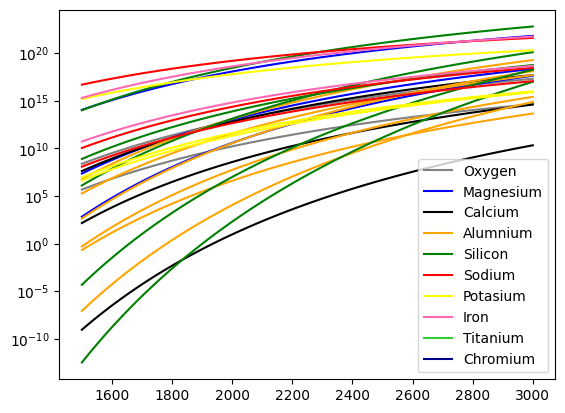

In [55]:

for i in range(len(Vapo_species)):
    plt.semilogy(T1,(density1dfT.iloc[i,0:101]),label=density1dfT['Species type'][i],color=density1dfT['Color'][i])
    plt.legend()

In [ ]:
color=density1dfT['Color'][0]
color

Now try for mol_elem_frac

In [ ]:
molfrac1df = pd.DataFrame(mol_elem_frac1[:,0,:],index=T1,columns=elements)
molfrac1dfT = molfrac1df.T

In [ ]:
molfrac1df

In [ ]:

molfrac1dfT['Element']=elements

In [ ]:
molfrac1dfT

In [ ]:
color=['']*10
#species_type
molfrac1dfT['Color']=color
molfrac1dfT
for i in range(10):
    if elements[i]=='Oxygen':
        color[i]='grey'
    if elements[i]=='Magensium':
        color[i]='blue'
    if elements[i]=='Calcium':
        color[i]='black'
    if elements[i]=='Alumnium':
        color[i]='orange'
    if elements[i]=='Silicon':
        color[i]='green'
    if elements[i]=='Sodium':
        color[i]='red'
    if elements[i]=='Potasium':
        color[i]='yellow'
    if elements[i]=='Iron':
        color[i]='hotpink'
    if elements[i]=='Titanium':
        color[i]='limegreen'
    if elements[i]=='Chromium':
        color[i]='darkblue'

In [ ]:
molfrac1dfT['Color']=color
molfrac1dfT

In [ ]:
for i in range(len(elements)):
    plt.semilogy(T1,(molfrac1dfT.iloc[i,0:101]),label=molfrac1dfT['Element'][i],color=molfrac1dfT['Color'][i])
    plt.legend()

In [ ]:
for i in range(len(dlogfO2)):
    density[i]=i+1
density[2]

In [99]:
col_density_dataframes=['Col_Densitydf(-4)','Col_Densitydf(-3)','Col_Densitydf(-2)','Col_Densitydf(-1)','Col_Densitydf(0)','Col_Densitydf(1)','Col_Densitydf(2)','Col_Densitydf(3)','Col_Densitydf(4)','Col_Densitydf(5)','Col_Densitydf(6)','Col_Densitydf(7)']
col_densityt_dataframes=['Col_Densitytdf(-4)','Col_Densitytdf(-3)','Col_Densitytdf(-2)','Col_Densitytdf(-1)','Col_Densitytdf(0)','Col_Densitytdf(1)','Col_Densitytdf(2)','Col_Densitytdf(3)','Col_Densitytdf(4)','Col_Densitytdf(5)','Col_Densitytdf(6)','Col_Densitytdf(7)']

In [100]:

for i in range(len(dlogfO2)):
        col_density_dataframes[i] = pd.DataFrame(density1[:,i,:],index=T1,columns=Vapo_species)
        col_densityt_dataframes[i]= col_density_dataframes[i].T
        Vapo_species
        col_densityt_dataframes[i]['Species name']=Vapo_species
        species_type=['a']*34
        #species_type
        col_densityt_dataframes[i]['Species type']=species_type
        for j in range(34):
            if Vapo_species[j][0]=='O':
                species_type[j]='Oxygen'
            if Vapo_species[j][0]=='M':
                species_type[j]='Magnesium'
            if Vapo_species[j][0]=='C':
                species_type[j]='Calcium'
            if Vapo_species[j][0]=='A':
                species_type[j]='Alumnium'
            if Vapo_species[j][0]=='S':
                species_type[j]='Silicon'
            if Vapo_species[j][0]=='N':
                species_type[j]='Sodium'
            if Vapo_species[j][0]=='K':
                species_type[j]='Potasium'
            if Vapo_species[j][0]=='F':
                species_type[j]='Iron'
            if Vapo_species[j][0]=='T':
                species_type[j]='Titanium'
            if Vapo_species[j][1]=='r':
                species_type[j]='Chromium'
        col_densityt_dataframes[i]['Species type']=species_type
        col_densityt_dataframes[i]['Species type'] = densityt_dataframes[i]['Species type'].where(~densityt_dataframes[i]['Species type'].duplicated(),'')
        color=['a']*34
        #species_type
        densityt_dataframes[i]['Color']=color
        for j in range(34):
            if species_type[j][0]=='O':
                color[j]='grey'
            if species_type[j][0]=='M':
                color[j]='blue'
            if species_type[j][0]=='C':
                color[j]='black'
            if species_type[j][0]=='A':
                color[j]='orange'
            if species_type[j][0]=='S':
                color[j]='green'
            if species_type[j][2]=='d':
                color[j]='red'
            if species_type[j][0]=='P':
                color[j]='yellow'
            if species_type[j][0]=='I':
                color[j]='hotpink'
            if species_type[j][0]=='T':
                color[j]='limegreen'
            if species_type[j][1]=='h':
                color[j]='darkblue'
        col_densityt_dataframes[i]['Color']=color


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [94]:
partialpress_dataframes=['partialpressdf(-4)','partialpressdf(-3)','partialpressdf(-2)','partialpressdf(-1)','partialpressdf(0)','partialpressdf(1)','partialpressdf(2)','partialpressdf(3)','partialpressdf(4)','partialpressdf(5)','partialpressdf(6)','partialpressdf(7)']
partialpresst_dataframes=['partialpressdft(-4)','partialpressdft(-3)','partialpressdft(-2)','partialpressdft(-1)','partialpressdft(0)','partialpressdft(1)','partialpressdft(2)','partialpressdft(3)','partialpressdft(4)','partialpressdft(5)','partialpressdft(6)','partialpressdft(7)']

In [95]:

for i in range(len(dlogfO2)):
        partialpress_dataframes[i] = pd.DataFrame(LOGP1[:,i,:],index=T1,columns=Vapo_species)
        partialpresst_dataframes[i]= partialpress_dataframes[i].T
        Vapo_species
        partialpresst_dataframes[i]['Species name']=Vapo_species
        species_type=['a']*34
        #species_type
        partialpresst_dataframes[i]['Species type']=species_type
        partialpresst_dataframes
        for j in range(34):
            if Vapo_species[j][0]=='O':
                species_type[j]='Oxygen'
            if Vapo_species[j][0]=='M':
                species_type[j]='Magnesium'
            if Vapo_species[j][0]=='C':
                species_type[j]='Calcium'
            if Vapo_species[j][0]=='A':
                species_type[j]='Alumnium'
            if Vapo_species[j][0]=='S':
                species_type[j]='Silicon'
            if Vapo_species[j][0]=='N':
                species_type[j]='Sodium'
            if Vapo_species[j][0]=='K':
                species_type[j]='Potasium'
            if Vapo_species[j][0]=='F':
                species_type[j]='Iron'
            if Vapo_species[j][0]=='T':
                species_type[j]='Titanium'
            if Vapo_species[j][1]=='r':
                species_type[j]='Chromium'
        partialpresst_dataframes[i]['Species type']=species_type
        partialpresst_dataframes[i]['Species type'] = partialpresst_dataframes[i]['Species type'].where(~densityt_dataframes[i]['Species type'].duplicated(),'')
        color=['a']*34
        #species_type
        partialpresst_dataframes[i]['Color']=color
        for j in range(34):
            if species_type[j][0]=='O':
                color[j]='grey'
            if species_type[j][0]=='M':
                color[j]='blue'
            if species_type[j][0]=='C':
                color[j]='black'
            if species_type[j][0]=='A':
                color[j]='orange'
            if species_type[j][0]=='S':
                color[j]='green'
            if species_type[j][2]=='d':
                color[j]='red'
            if species_type[j][0]=='P':
                color[j]='yellow'
            if species_type[j][0]=='I':
                color[j]='hotpink'
            if species_type[j][0]=='T':
                color[j]='limegreen'
            if species_type[j][1]=='h':
                color[j]='darkblue'
        partialpresst_dataframes[i]['Color']=color


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [101]:
density_dataframes=['densitydf(-4)','densitydf(-3)','densitydf(-2)','densitydf(-1)','densitydf(0)','densitydf(1)','densitydf(2)','densitydf(3)','densitydf(4)','densitydf(5)','densitydf(6)','densitydf(7)']
densityt_dataframes=['densitytdf(-4)','densitytdf(-3)','densitytdf(-2)','densitytdf(-1)','densitytdf(0)','densitytdf(1)','densitytdf(2)','densitytdf(3)','densitytdf(4)','densitytdf(5)','densitytdf(6)','densitytdf(7)']

In [108]:

for i in range(len(dlogfO2)):
        density_dataframes[i] = pd.DataFrame(density_high1[:,i,:],index=T1,columns=Vapos)
        densityt_dataframes[i]= density_dataframes[i].T
        Vapos
        densityt_dataframes[i]['Species name']=Vapos
        #species_type
        densityt_dataframes[i]['Species type']=Vapos
        densityt_dataframes
        for j in range(34):
            if Vapo_species[j][0]=='O':
                species_type[j]='Oxygen'
            if Vapo_species[j][0]=='M':
                species_type[j]='Magnesium'
            if Vapo_species[j][0]=='C':
                species_type[j]='Calcium'
            if Vapo_species[j][0]=='A':
                species_type[j]='Alumnium'
            if Vapo_species[j][0]=='S':
                species_type[j]='Silicon'
            if Vapo_species[j][0]=='N':
                species_type[j]='Sodium'
            if Vapo_species[j][0]=='K':
                species_type[j]='Potasium'
            if Vapo_species[j][0]=='F':
                species_type[j]='Iron'
            if Vapo_species[j][0]=='T':
                species_type[j]='Titanium'
            if Vapo_species[j][1]=='r':
                species_type[j]='Chromium'
        densityt_dataframes[i]['Species type']=Vapos
        densityt_dataframes[i]['Species type'] = partialpresst_dataframes[i]['Species type'].where(~densityt_dataframes[i]['Species type'].duplicated(),'')
        color=['a']*20
        #species_type
        densityt_dataframes[i]['Color']=color
        for j in range(20):
            if species_type[j][0]=='O':
                color[j]='grey'
            if species_type[j][0]=='M':
                color[j]='blue'
            if species_type[j][0]=='C':
                color[j]='black'
            if species_type[j][0]=='A':
                color[j]='orange'
            if species_type[j][0]=='S':
                color[j]='green'
            if species_type[j][2]=='d':
                color[j]='red'
            if species_type[j][0]=='P':
                color[j]='yellow'
            if species_type[j][0]=='I':
                color[j]='hotpink'
            if species_type[j][0]=='T':
                color[j]='limegreen'
            if species_type[j][1]=='h':
                color[j]='darkblue'
        densityt_dataframes[i]['Color']=color


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [109]:
densityt_dataframes[0]

,1500.0,1515.0,1530.0,1545.0,1560.0,1575.0,1590.0,1605.0,1620.0,1635.0,...,2910.0,2925.0,2940.0,2955.0,2970.0,2985.0,3000.0,Species name,Species type,Color
O2(g),1.035589e+14,1.559094e+14,2.328000e+14,3.448454e+14,5.068716e+14,7.394364e+14,1.070845e+15,1.539802e+15,2.198887e+15,3.119062e+15,...,3.594247e+22,3.989647e+22,4.423628e+22,4.899455e+22,5.420627e+22,5.990884e+22,6.614227e+22,O2(g),Oxygen,grey
O(g),1.131621e+14,1.648009e+14,2.381097e+14,3.413946e+14,4.858438e+14,6.864232e+14,9.630168e+14,1.341869e+15,1.857398e+15,2.554467e+15,...,4.113445e+21,4.485226e+21,4.885603e+21,5.316359e+21,5.779360e+21,6.276555e+21,6.809981e+21,O(g),Oxygen,grey
NaO(g),2.059224e+15,2.799037e+15,3.780470e+15,5.074545e+15,6.770830e+15,8.981651e+15,1.184713e+16,1.554115e+16,2.027841e+16,2.632272e+16,...,3.724430e+21,4.009052e+21,4.311853e+21,4.633746e+21,4.975679e+21,5.338629e+21,5.723608e+21,NaO(g),,blue
Na(g),5.076170e+16,6.395285e+16,8.019346e+16,1.000999e+17,1.243948e+17,1.539217e+17,1.896623e+17,2.327538e+17,2.845097e+17,3.464414e+17,...,3.002449e+21,3.179460e+21,3.364795e+21,3.558735e+21,3.761567e+21,3.973581e+21,4.195073e+21,Na(g),NaN,blue
SiO2(g),1.579065e+15,2.008659e+15,2.542590e+15,3.203124e+15,4.016608e+15,5.014089e+15,6.232006e+15,7.712962e+15,9.506579e+15,1.167044e+16,...,1.465164e+20,1.555238e+20,1.649776e+20,1.748940e+20,1.852897e+20,1.961816e+20,2.075870e+20,SiO2(g),NaN,blue
FeO(g),1.304660e+06,2.476368e+06,4.641332e+06,8.592912e+06,1.572036e+07,2.842873e+07,5.083563e+07,8.991500e+07,1.573554e+08,2.725487e+08,...,4.895274e+19,5.802116e+19,6.865023e+19,8.108779e+19,9.561767e+19,1.125644e+20,1.322987e+20,FeO(g),,black
KO(g),6.264501e+06,1.119126e+07,1.976095e+07,3.450022e+07,5.957506e+07,1.017825e+08,1.720996e+08,2.880797e+08,4.775223e+08,7.840453e+08,...,8.206223e+18,9.516277e+18,1.101808e+19,1.273711e+19,1.470186e+19,1.694416e+19,1.949955e+19,KO(g),NaN,black
MgO(g),7.920875e+08,1.253592e+09,1.965729e+09,3.054876e+09,4.706303e+09,7.189381e+09,1.089265e+10,1.637222e+10,2.441801e+10,3.614397e+10,...,2.949137e+18,3.313793e+18,3.718882e+18,4.168354e+18,4.666487e+18,5.217913e+18,5.827643e+18,MgO(g),,black
K(g),5.344657e+10,7.821684e+10,1.135599e+11,1.636049e+11,2.339450e+11,3.321023e+11,4.681255e+11,6.553492e+11,9.113561e+11,1.259186e+12,...,2.760942e+18,3.019231e+18,3.298259e+18,3.599398e+18,3.924086e+18,4.273834e+18,4.650226e+18,K(g),NaN,orange
SiO(g),1.116655e+10,1.668364e+10,2.472083e+10,3.633638e+10,5.299422e+10,7.670465e+10,1.102086e+11,1.572176e+11,2.227232e+11,3.133957e+11,...,1.716958e+18,1.889603e+18,2.077343e+18,2.281287e+18,2.502612e+18,2.742561e+18,3.002448e+18,SiO(g),,orange


101


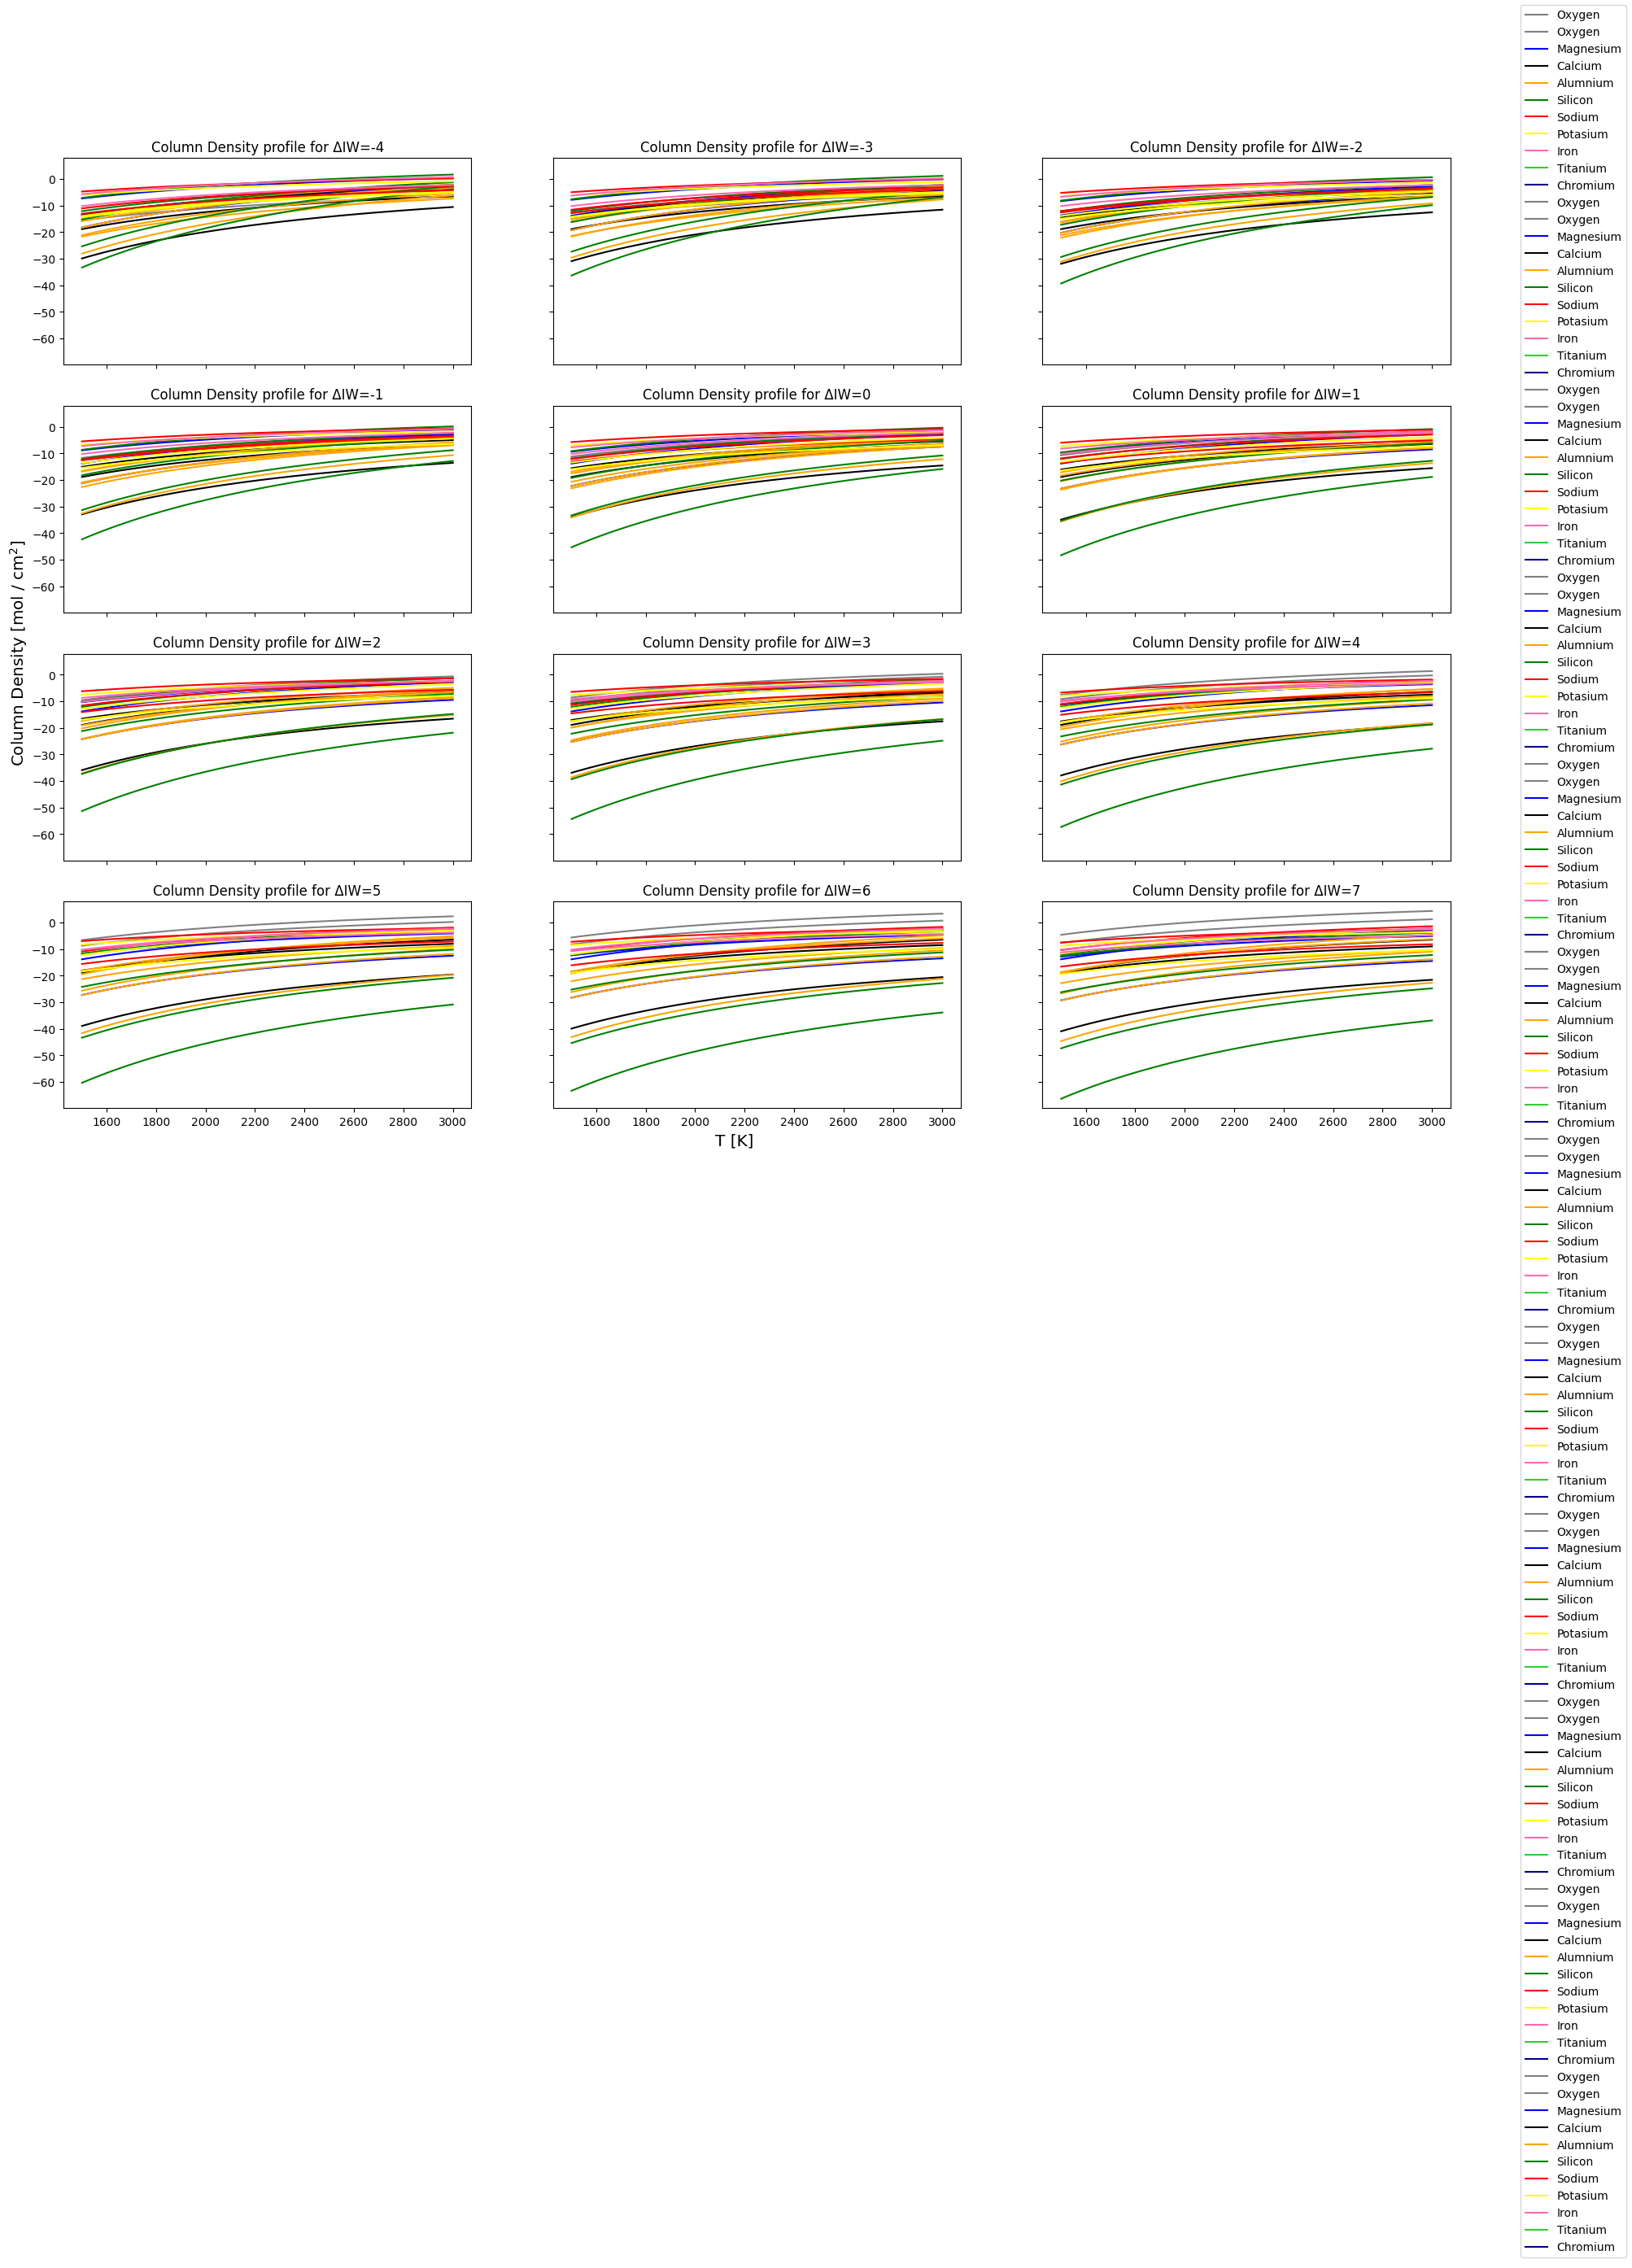

In [ ]:

fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(len(Vapo_species)):
            ax =axes[j]
            ax.plot(T1,(partialpresst_dataframes[j].iloc[i,0:101]),color=partialpresst_dataframes[0]['Color'][i],label=partialpresst_dataframes[0]['Species type'][i])
            #ax.set_xlabel('T  [K]')
            #ax.set_ylabel(r'Column Density [mol / cm$^2$]')
            ax.set_title( "Column Density profile for \u0394IW=" +str(dlogfO2[j]))

fig.text(0.5,0.125,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,r'Column Density [mol / cm$^2$]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.15)  
fig.legend()
#plt.savefig('column density profiles with corrected fo2.png')



In [98]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(22,16),sharex=True,sharey=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(len(Vapo_species)):
            ax =axes[j]
            ax.semilogy(T1,(densityt_dataframes[j].iloc[i,0:101]),color=densityt_dataframes[0]['Color'][i],label=densityt_dataframes[0]['Species type'][i])
            #ax.set_xlabel('T  [K]')
            #ax.set_ylabel(r'Column Density [mol / cm$^2$]')
            ax.set_title( "Column Density profile for \u0394IW=" +str(dlogfO2[j]))

fig.text(0.5,0.125,'T [K]', va='center', ha='center',fontsize='x-large')
fig.text(0.1,0.5,r'Column Density [mol / cm$^2$]', rotation='vertical',va='center', ha='center',fontsize='x-large')
fig.subplots_adjust(bottom=0.15)  
fig.legend()
#plt.savefig('column density profiles with corrected fo2.png')


101
